# Polynomial Regression using statsmodel

I've been using sci-kit learn for a while, but it is heavily abstracted for getting quick results for machine learning. Particularly, sklearn doesnt provide statistical inference of model parameters such as 'standard errors'. Statsmodel package is rich with descriptive statistics and provides number of models.

Let's implement Polynomial Regression using statsmodel

### Import basic packages


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Create artificial data



(50, 1)
(50, 1)


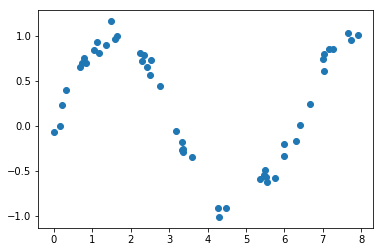

In [2]:
rng = np.random.RandomState(1)
x = 8 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

#Create single dimension
x= x[:,np.newaxis]
y= y[:,np.newaxis]

inds = x.ravel().argsort()  # Sort x values and get index    
x = x.ravel()[inds].reshape(-1,1)
y = y[inds] #Sort y according to x sorted index

print(x.shape)
print(y.shape)

#Plot
plt.scatter(x,y)

### Running simple linear Regression first using statsmodel OLS

Although simple linear line won't fit our $x$ data still let's see how it performs.

$$ y  = b_0+ b_1x $$

where $b_0$ is bias and $ b_1$ is weight for simple Linear Regression equation.

Statsmodel provides [OLS model](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) (ordinary Least Sqaures) for simple linear regression.


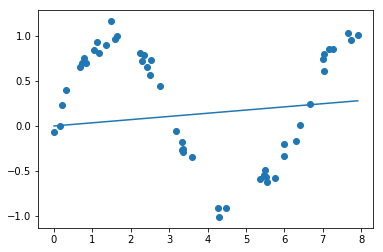

In [3]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()
ypred = model.predict(x) 

plt.scatter(x,y)
plt.plot(x,ypred)

### Generate Polynomials

Clearly it did not fit because input is roughly a sin wave with noise, so at least 3rd degree polynomials are required.



#### Polynomial Regression for 3 degrees , 

$$ y = b_0 + b_1x + b_2x^2 + b_3x^3 $$
where $b_n$ are biases for $x$ polynomial. 

This is still a linear model—the linearity refers to the fact that the coefficients $b_n$ never multiply or divide each other. 

Although we are using statsmodel for regression, we'll use [sklearn for generating Polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) as it provides simple function to generate polynomials


In [4]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x)
xp.shape

(50, 4)

### Running regression on polynomials using statsmodel OLS 


In [5]:
import statsmodels.api as sm

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

ypred.shape

(50,)

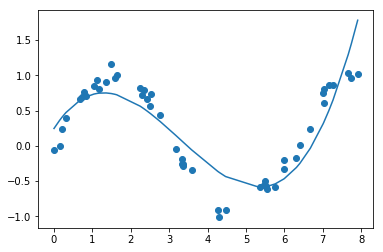

In [6]:
plt.scatter(x,y)
plt.plot(x,ypred)

### Looks like even degree 3 polynomial isn't fitting well to our data

Let's use 5 degree polynomial.

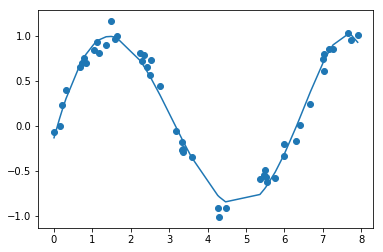

In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(x)
xp.shape

model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

plt.scatter(x,y)
plt.plot(x,ypred)


5 degree polynomial is adequatly fitting data. If we increase more degrees, model will overfit.

### Model Summary

As I mentioned earlier, statsmodel provided descriptive statistics of model.

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     336.2
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           7.19e-34
Time:                        11:59:50   Log-Likelihood:                 44.390
No. Observations:                  50   AIC:                            -76.78
Df Residuals:                      44   BIC:                            -65.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1327      0.070     -1.888      0.066      -0.274       0.009
x1             1.5490      0.184      8.436      0.000       1.179       1.919
x2            -0.4651      0.149     -3.126      0.003      -0.765      -0.165
x3            -0.0921      0.049     -1.877      0.067      -0.191       0.007
x4             0.0359      0.007      5.128      0.000       0.022       0.050
x5            -0.0025      0.000     -6.954      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        1.186   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.027
Skew:                           0.133   Prob(JB):                        0.598
Kurtosis:                       2.351   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting lower and upper confidance intervals
[`wls_prediction_std`](https://) calculates standard deviation and confidence interval for prediction.





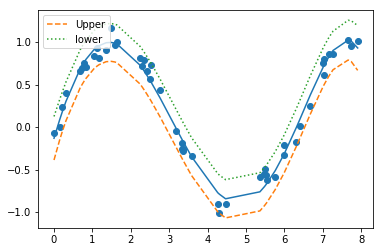

In [9]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(model)

plt.scatter(x,y)
plt.plot(x,ypred)
plt.plot(x,upper,'--',label="Upper") # confid. intrvl
plt.plot(x,lower,':',label="lower")
plt.legend(loc='upper left')
